# <img src="https://img.icons8.com/dusk/64/000000/artificial-intelligence.png" style="height:50px;display:inline"> EE 046202 - Technion - Unsupervised Learning & Data Analysis

* Formerly 046193 

## Computer Assignment 2 - Variational Autoencoders & Clustering

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda

* Variational Autoencoders (VAEs)
    * $\beta$-VAE
    * Conditional VAE (CVAE)
    * BONUS: Generating Pokemons
* Clustering
    * Spectral Clustering for Image Segmentation
    * Spectral Clustering vs. K-Means for Image Segmentation

#### Use as many cells as you need
#### אפשר גם לכתוב בעברית, אבל עדיף באנגלית

* Code Tasks are denoted with: <img src="https://img.icons8.com/color/48/000000/code.png">
* Questions (which you need to answer in a Markdown cell) are denoted with: <img src="https://img.icons8.com/bubbles/48/000000/ask-question.png">

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Students Information
* Fill in

|Name         |Campus Email                    | ID       |
|-------------|--------------------------------|----------|
|Ido Nutov    | notov@campus.technion.ac.il    | 305242968|
|Hosam Salamy | hosams@campus.technion.ac.il   | 302791728|



### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
* Submission only in **pairs**.
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* **BONUS**:
    * 5 points - completing the Pokemon task with *fully-connected* layers (black & white version)
    * 10 points - completing the Pokemon task with *convolutional* layers (RGB version)
* What you have to submit:
    * If you have answered the questions in the notebooke, you should submit this file onlt, with the name: `ee046202_wet2_id1_id2.ipynb`.
    * If you answered the questionss in a different file you should submit a `.zip` file with the name `ee046202_wet2_id1_id2.zip` with content:
        * `ee046202_wet2_id1_id2.ipynb` - the code tasks
        * `ee046202_wet2_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/cute-clipart/64/000000/info.png" style="height:50px;display:inline"> Tip

If you find it more convenient, you can copy the section to a new cell, and answer the question or rite the code just right below it. For example:

#### Question 0
1. What is the best course in the Technion?
2. Why does no one pick Bulbasaur as first pokemon?
3. Why is there no superhero named Catman?

#### Answers - Q0

#### Q0 - Section 1
* Q: What is the best course in the Technion?

In [1]:
print("ANAM!")

ANAM!


#### Q0 - Section 2
* Q: Why does no one pick Bulbasaur as first pokemon?

It is really a riddle....

#### Q0 - Section 3
* Q: Why is there no superhero named Catman?

I got nothing.

### <img src="https://img.icons8.com/cotton/64/000000/grand-master-key.png" style="height:50px;display:inline"> Part 1 - Variational Autoencoders - Prologue
In this section of the exercise we will analyze the VAE and introduce an enhacement called $\beta$-VAE and a variation of VAE that allows us some control over the latent space using conditional probability - Conditional Variational Autoencoder.

For this part, you are provided the original implementation of the VAE from the tutorial. You will have to modify it throughout the tasks (yes yes, you can copy-paste from the original implementation).
* **Note** - for better results you should tune the model!
    * You can add layers / hidden units / different activations (ReLU, TanH, LeakyReLU, Sigmoid...)
    * You can choose a different optimizer than Adam (SGD, RMSProp...), tune the learning rate...
    * You can change the reconstruction loss (BCE, MSE, L1...)
    * Other hyper-parameters like the batch-size, number of epochs and etc...

We recommend running this part on Google Colab or on a GPU (if you have an access to one). Note that running on a GPU will lead to about x2 speedup in training. 

In [1]:
# imports for the exrcise - part 1
# you can add more if you wish (but it is not really needed)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, ConcatDataset
import torchvision

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1 - $\beta$-VAE

In the standard VAE an isotropic Gaussian ($p(z) \sim \mathcal{N}(0, I)$) is typically assumed as the prior distribution for z. Note that under this distribution the components of z are independent (e.g. disentangled - a disentangled representation can be defined as one where single latent units are sensitive to changes in single generative factors, while being relatively invariant to changes in other factors) which is exactly the property we would like our approximate posterior distribution (e.g. $q(z|x)$) to have. Thus, to encourage independence we increase the KL-divergence term in the ELBO by a factor of $\beta$: $$ \mathcal{L}_{\beta-VAE} = -\mathbb{E}_{q_{\phi(z|x)}}[p_{\theta}(x|z)] + \beta \cdot D_{KL}[q_{\theta}(z|x) || p(z)]  $$
   * Training is performed exactly the same as for the standard VAE.
   * When $\beta=1$, it is same as VAE.
   * When $\beta>1$, it applies a stronger constraint on the latent bottleneck and limits the representation capacity of $z$. 
       * For some conditionally independent generative factors, keeping them disentangled is the most efficient representation.
   * When $0<\beta<1$, it can be interpreted as optimizing an approximate log marginal likelihood bound under an alternative prior, regularized to prevent degeneracy (of the KL-divergence).
   
The tasks:
1. Modify the loss function to support $\beta$-VAE. The function should return the reconstruction loss, the kl-divergence (**without the multiplication by $\beta$**) and and the total loss.
    * The signature of the function should be: `beta_loss_function(recon_x, x, mu, logvar, loss_type='bce', beta=1)`
    * The reconstruction loss, the kl-divergence and and the total loss should be normalzied by the batch size.
    * The returned reconstruction loss and kl-divergence should be converted to numpy: `kl_d.data.cpu().numpy()`
2. Load the MNIST dataset, as in the tutorial, and create a train loader.
3. For $\beta=[0.05, 0.5, 1, 5]$, train a $\beta$-VAE for 50 epochs and keep track of:
    * The average reconstruction loss in each epoch
    * The average KL-divergence in each epoch
    * A checkpoint of the network in the format: `beta_(value of beta)_vae_50_epochs.pth` (there is an example in the tutorial)
    * This may take a while, so go grab a coffee in the meantime :)
4. For $\beta=[0.05, 0.5, 1, 5]$, plot the KL-divergence and reconstruction error vs. epochs.
5. For $\beta=[0.05, 0.5, 1, 5]$, generate 5 samples from the VAE and plot them (`imshow`...). Run this a couple of times to get an impression of the samples for each $\beta$.


* Notes:
    * Be organized - separate to different code cells if it keeps you organized.
    * Make sure to properly define the hyper-parameters (see tutorial), and define the `device` automatically. Don't forget to send all the models and tensors to the device. We will run your code on a GPU.
    * If you are not satisfied with the results, and you have time, you can try and increase the number of epochs to 100, and see what happens.

In [2]:
# Mnist DataLoader

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
batch_size = 64
# MNIST
mnist_train_dataset = torchvision.datasets.MNIST(root='./datasets/',
                                           train=True, 
                                           transform=torchvision.transforms.ToTensor(),
                                           download=True)

mnist_test_dataset = torchvision.datasets.MNIST(root='./datasets',
                                          train=False, 
                                          transform=torchvision.transforms.ToTensor())

# Data loader
mnist_train_loader = torch.utils.data.DataLoader(dataset=mnist_train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True, drop_last=True)

# We use drop_last=True to avoid the case where the data / batch_size != int

mnist_test_loader = torch.utils.data.DataLoader(dataset=mnist_test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)


cuda:0


In [3]:
def reparameterize(mu, logvar, device=torch.device("cpu")):
    """
    This function applies the reparameterization trick:
    z = mu(X) + sigma(X)^0.5 * epsilon, where epsilon ~ N(0,I)
    :param mu: mean of x
    :param logvar: log variance of x
    :param device: device to perform calculations on
    :return z: the sampled latent variable
    """
    std = torch.exp(0.5 * logvar)
    eps = torch.randn_like(std).to(device)
    return mu + eps * std

In [4]:
# Class for the encoder 

class Encoder(nn.Module):
    def __init__(self,z_dim = 10,x_dim = 28*28,device = torch.device("cpu")):
        super(Encoder, self).__init__()
        # network parameters
        self.z_dim = z_dim
        self.x_dim = x_dim
        self.device = device
        # network fully connected layers
        
        self.fc1 = nn.Linear(x_dim,512)
        self.fc2 = nn.Linear(512,256)
        #self.fc3 = nn.Linear(256,64)
        
        # latent variable networks
        self.mu_nn = nn.Linear(256,z_dim)
        self.log_var_nn = nn.Linear(256,z_dim)
        
        self.dropout = nn.Dropout(p=0.1)
    
    def forward(self,x):
        x = x.view(-1,self.x_dim)
        # Forward propogation
        x = F.relu(self.dropout(self.fc1(x)))
        x = self.dropout(self.fc2(x))
        #x = F.relu(self.dropout(self.fc3(x)))
        mu = self.mu_nn(x)
        log_var = self.log_var_nn(x)
        
        z = reparameterize(mu, log_var, self.device)
        # returns the latent variable the m,ean and the log variance
        # 
        return z,mu,log_var
        

In [5]:
# Class for the decoder 
class Decoder(nn.Module):
    def __init__(self,z_dim = 10,x_dim = 28*28,device = torch.device("cpu")):
        super(Decoder, self).__init__()
        # network parameters
        self.z_dim = z_dim
        self.x_dim = x_dim
        self.device = device
        
        # network fully connected layers
        
        #self.fc4 = nn.Linear(256,x_dim)
        self.fc3 = nn.Linear(512,x_dim)
        self.fc2 = nn.Linear(256,512)
        self.fc1 = nn.Linear(self.z_dim,256)
        
        self.dropout = nn.Dropout(p=0.1)
    
    def forward(self,x):
        x = F.relu(self.dropout(self.fc1(x)))
        x = F.relu(self.dropout(self.fc2(x)))
        x =  torch.sigmoid(self.dropout(self.fc3(x)))
        #x = F.relu(self.dropout(self.fc4(x)))
        #x = torch.sigmoid(x)
        return x

In [6]:
class VAE_Model(nn.Module):
    def __init__(self,z_dim = 10,x_dim = 28*28,device = torch.device("cpu")):
        super(VAE_Model, self).__init__()
        
        self.z_dim = z_dim
        self.x_dim = x_dim
        self.device = device
        
        self.encoder = Encoder(self.z_dim , self.x_dim ,self.device)
        self.decoder = Decoder(self.z_dim,self.x_dim,self.device)
        
    def sample(self, num_samples=1):
        """
        This functions generates new data by sampling random variables and decoding them.
        Vae.sample() actually generates new data!
        Sample z ~ N(0,1)
        """
        z = torch.randn(num_samples, self.z_dim).to(self.device)
        return self.decoder(z)
    
    def forward(self,x):
        z,mu,log_var = self.encoder(x)
        x_r = self.decoder(z)
        return x_r,mu,log_var,z

In [7]:
# The total loss of the b-VAE
# Implemataion of the Elbo Estimation 
def beta_loss_function(recon_x, x, mu, logvar, loss_type='bce', beta=1):
    if loss_type == 'mse':
        recon_error = F.mse_loss(recon_x, x, reduction='sum')
    elif loss_type == 'l1':
        recon_error = F.l1_loss(recon_x, x, reduction='sum')
    elif loss_type == 'bce':
        recon_error = F.binary_cross_entropy(recon_x, x, reduction='sum')
    else:
        raise NotImplementedError
    
    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    kl = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    
    return (recon_error + beta*kl) / x.size(0), recon_error , kl

In [8]:
# Optimizer and model defenition 
X_DIM = 28*28
Z_DIM = 10
LEARNING_RATE = 0.002


Epochs = 50

beta_list = [0.05,0.5,1.0,5.0] 

In [10]:
# TODO Implement print function 
def Print_fn(epoch,loss,time,beta,train_test:str):
    print('epoch: {} loss: {:.5f} epoch time {:.3f}sec beta: {} , {}'.format(epoch,loss,time,beta,train_test))

In [11]:
# Saving the results in a dictionary of list
reconstruction_loss_list = {'train':[],'test':[]}
kl_loss_list = {'train':[],'test':[]}
total_loss_list = {'train':[],'test':[]}

# initialize a dictionary of list for batch results
batch_loss_dict = {'kl_loss':[],'reconstruction_loss':[],
                    'toatl_loss':[]}

# Training Loop
for beta in beta_list:
    #vae = VAE_Model(x_dim=X_DIM, z_dim=Z_DIM, device=device).to(device)
    vae = VAE_Model(x_dim=X_DIM, z_dim=Z_DIM, device=device).to(device)
    optimizer = torch.optim.Adam(params=vae.parameters(), lr=LEARNING_RATE)
    # Save losses for each batch in a list 
    batch_loss_dict['kl_loss'] = []
    batch_loss_dict['reconstruction_loss'] = []
    batch_loss_dict['toatl_loss'] = []
    
    for epoch in range(Epochs):
        epoch_start_time = time.time()
        for batch_i,batch in enumerate(mnist_train_loader):
            vae.train()
            #x = batch[0].to(device)
            x = batch[0].to(device)
            x = x.view(batch_size,-1)
            x_r,mu,log_var,z = vae(x)
            total_loss,recon_error , kl = beta_loss_function(x_r, x, mu, log_var, loss_type='bce', beta=beta)
            batch_loss_dict['kl_loss'].append(kl.item())
            batch_loss_dict['reconstruction_loss'].append(recon_error.item())
            batch_loss_dict['toatl_loss'].append(total_loss.item())   
            
            #total_loss.backward()
            optimizer.zero_grad()
            total_loss.backward()
            optimizer.step()
        
        kl_loss_list['train'].append(sum(batch_loss_dict['kl_loss'])/len(batch_loss_dict['kl_loss']))    
        
        reconstruction_loss_list['train'].append(sum(batch_loss_dict['reconstruction_loss'])/len(batch_loss_dict['reconstruction_loss']))    
        
        total_loss_list['train'].append(sum(batch_loss_dict['toatl_loss'])/len(batch_loss_dict['toatl_loss']))
        Print_fn(epoch,total_loss_list['train'][-1],time.time() - epoch_start_time,beta,'train')
        batch_loss_dict['kl_loss'] = []
        batch_loss_dict['reconstruction_loss'] = []
        batch_loss_dict['toatl_loss'] = []
        
        #TODO print results for training
        
        # This is the test/valid loop 
        for batch in mnist_test_loader:
            with torch.no_grad():
                
                vae.eval()
                x = batch[0].to(device)
                x_r,mu,log_var,z = vae(x)
                total_loss,recon_error , kl = beta_loss_function(x_r, x, mu, log_var, loss_type='bce', beta=beta)
                
                batch_loss_dict['kl_loss'].append(kl.item())
                batch_loss_dict['reconstruction_loss'].append(recon_error.item())
                batch_loss_dict['toatl_loss'].append(total_loss.item())                
                
        kl_loss_list['test'].append(sum(batch_loss_dict['kl_loss'])/len(batch_loss_dict['kl_loss']))    
        
        reconstruction_loss_list['test'].append(sum(batch_loss_dict['reconstruction_loss'])/len(batch_loss_dict['reconstruction_loss']))    
        
        total_loss_list['test'].append(sum(batch_loss_dict['toatl_loss'])/len(batch_loss_dict['toatl_loss']))                
        #TODO print results for testing
        
    fname = "./vae_mnist_"+"beta_" + str(beta) + ".pth"
    torch.save(vae.state_dict(), fname)
    print("saved checkpoint @", fname)

epoch: 0 loss: 169.25757 epoch time 16.409sec beta: 0.05 , train


E:\Anaconda\envs\cs236781-hw\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Using a target size (torch.Size([64, 1, 28, 28])) that is different to the input size (torch.Size([64, 784])) is deprecated. Please ensure they have the same size.
  if __name__ == '__main__':
E:\Anaconda\envs\cs236781-hw\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Using a target size (torch.Size([16, 1, 28, 28])) that is different to the input size (torch.Size([16, 784])) is deprecated. Please ensure they have the same size.
  if __name__ == '__main__':


epoch: 1 loss: 139.25306 epoch time 15.852sec beta: 0.05 , train
epoch: 2 loss: 136.36301 epoch time 15.883sec beta: 0.05 , train
epoch: 3 loss: 134.82469 epoch time 15.853sec beta: 0.05 , train
epoch: 4 loss: 134.09413 epoch time 15.798sec beta: 0.05 , train
epoch: 5 loss: 133.44814 epoch time 15.833sec beta: 0.05 , train
epoch: 6 loss: 132.95559 epoch time 15.878sec beta: 0.05 , train
epoch: 7 loss: 132.73046 epoch time 15.845sec beta: 0.05 , train
epoch: 8 loss: 132.64232 epoch time 15.838sec beta: 0.05 , train
epoch: 9 loss: 132.29799 epoch time 15.838sec beta: 0.05 , train
epoch: 10 loss: 132.08580 epoch time 15.832sec beta: 0.05 , train
epoch: 11 loss: 131.91258 epoch time 15.844sec beta: 0.05 , train
epoch: 12 loss: 131.64457 epoch time 15.861sec beta: 0.05 , train
epoch: 13 loss: 131.68108 epoch time 15.887sec beta: 0.05 , train
epoch: 14 loss: 131.61813 epoch time 15.898sec beta: 0.05 , train
epoch: 15 loss: 131.31121 epoch time 15.922sec beta: 0.05 , train
epoch: 16 loss: 131

epoch: 26 loss: 155.51066 epoch time 15.815sec beta: 1.0 , train
epoch: 27 loss: 155.54965 epoch time 15.874sec beta: 1.0 , train
epoch: 28 loss: 155.41398 epoch time 15.846sec beta: 1.0 , train
epoch: 29 loss: 155.40820 epoch time 15.837sec beta: 1.0 , train
epoch: 30 loss: 155.44516 epoch time 15.886sec beta: 1.0 , train
epoch: 31 loss: 155.47612 epoch time 15.794sec beta: 1.0 , train
epoch: 32 loss: 155.48353 epoch time 15.846sec beta: 1.0 , train
epoch: 33 loss: 155.29413 epoch time 15.838sec beta: 1.0 , train
epoch: 34 loss: 155.23110 epoch time 15.866sec beta: 1.0 , train
epoch: 35 loss: 155.30983 epoch time 15.850sec beta: 1.0 , train
epoch: 36 loss: 155.23991 epoch time 15.872sec beta: 1.0 , train
epoch: 37 loss: 155.19752 epoch time 15.909sec beta: 1.0 , train
epoch: 38 loss: 155.25346 epoch time 15.898sec beta: 1.0 , train
epoch: 39 loss: 155.27294 epoch time 15.825sec beta: 1.0 , train
epoch: 40 loss: 155.23692 epoch time 15.838sec beta: 1.0 , train
epoch: 41 loss: 155.17179

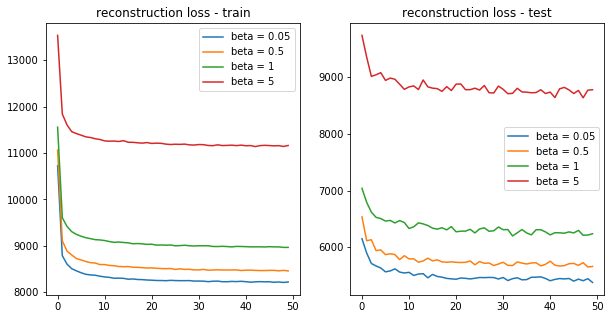

In [12]:
# We plot the train and test losses for each beta 

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axes[0].plot(range(Epochs),reconstruction_loss_list['train'][0:Epochs],label='beta = 0.05')
axes[1].plot(range(Epochs),reconstruction_loss_list['test'][0:Epochs],label='beta = 0.05')

axes[0].plot(range(Epochs),reconstruction_loss_list['train'][Epochs:2*Epochs],label='beta = 0.5')
axes[1].plot(range(Epochs),reconstruction_loss_list['test'][Epochs:2*Epochs],label='beta = 0.5')

axes[0].plot(range(Epochs),reconstruction_loss_list['train'][2*Epochs:3*Epochs],label='beta = 1')
axes[1].plot(range(Epochs),reconstruction_loss_list['test'][2*Epochs:3*Epochs],label='beta = 1')

axes[0].plot(range(Epochs),reconstruction_loss_list['train'][3*Epochs:4*Epochs],label='beta = 5')
axes[1].plot(range(Epochs),reconstruction_loss_list['test'][3*Epochs:4*Epochs],label='beta = 5')



axes[0].set_title('reconstruction loss - train')
axes[1].set_title('reconstruction loss - test')

axes[0].legend()
axes[1].legend()

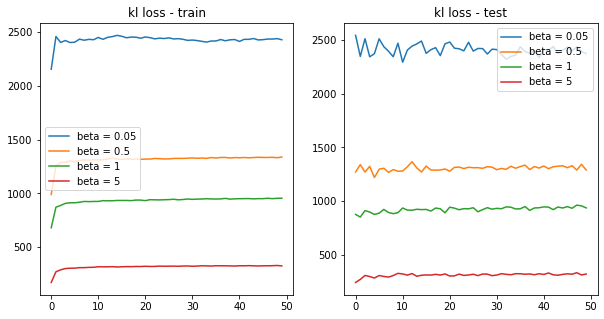

In [13]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))


axes[0].plot(range(Epochs),kl_loss_list['train'][0:Epochs],label='beta = 0.05')
axes[1].plot(range(Epochs),kl_loss_list['test'][0:Epochs],label='beta = 0.05')

axes[0].plot(range(Epochs),kl_loss_list['train'][Epochs:2*Epochs],label='beta = 0.5')
axes[1].plot(range(Epochs),kl_loss_list['test'][Epochs:2*Epochs],label='beta = 0.5')

axes[0].plot(range(Epochs),kl_loss_list['train'][2*Epochs:3*Epochs],label='beta = 1')
axes[1].plot(range(Epochs),kl_loss_list['test'][2*Epochs:3*Epochs],label='beta = 1')

axes[0].plot(range(Epochs),kl_loss_list['train'][3*Epochs:4*Epochs],label='beta = 5')
axes[1].plot(range(Epochs),kl_loss_list['test'][3*Epochs:4*Epochs],label='beta = 5')



axes[0].set_title('kl loss - train')
axes[1].set_title('kl loss - test')

axes[0].legend()
axes[1].legend()


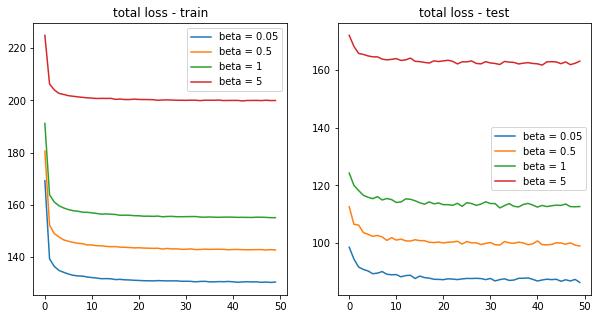

In [14]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))


axes[0].plot(range(Epochs),total_loss_list['train'][0:Epochs],label='beta = 0.05')
axes[1].plot(range(Epochs),total_loss_list['test'][0:Epochs],label='beta = 0.05')

axes[0].plot(range(Epochs),total_loss_list['train'][Epochs:2*Epochs],label='beta = 0.5')
axes[1].plot(range(Epochs),total_loss_list['test'][Epochs:2*Epochs],label='beta = 0.5')

axes[0].plot(range(Epochs),total_loss_list['train'][2*Epochs:3*Epochs],label='beta = 1')
axes[1].plot(range(Epochs),total_loss_list['test'][2*Epochs:3*Epochs],label='beta = 1')

axes[0].plot(range(Epochs),total_loss_list['train'][3*Epochs:4*Epochs],label='beta = 5')
axes[1].plot(range(Epochs),total_loss_list['test'][3*Epochs:4*Epochs],label='beta = 5')



axes[0].set_title('total loss - train')
axes[1].set_title('total loss - test')

axes[0].legend()
axes[1].legend()

In [15]:
# For each beta we will generate 5 samples from the test data 

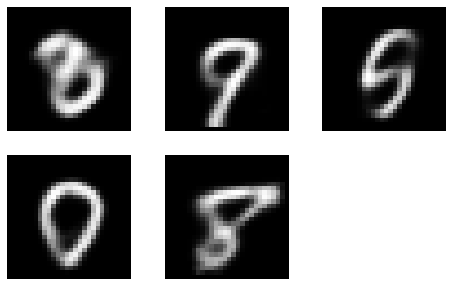

In [9]:
vae_beta_1 = VAE_Model(x_dim=X_DIM, z_dim=Z_DIM, device=device).to(device)
vae_beta_1.load_state_dict(torch.load('vae_mnist_beta_0.05.pth'))

n_samples = 5
vae_beta_1.eval()
vae_samples = vae_beta_1.sample(num_samples=n_samples).view(n_samples, 28, 28).data.cpu().numpy()
fig = plt.figure(figsize=(8 ,5))
for i in range(vae_samples.shape[0]):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.imshow(vae_samples[i], cmap='gray')
    ax.set_axis_off()

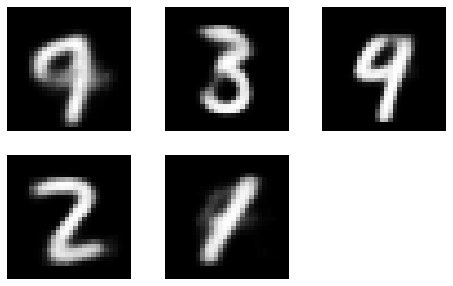

In [163]:
vae_beta_2 = VAE_Model(x_dim=X_DIM, z_dim=Z_DIM, device=device).to(device)
vae_beta_2.load_state_dict(torch.load('vae_mnist_beta_0.5.pth'))

n_samples = 5
vae_beta_2.eval()
vae_samples = vae_beta_2.sample(num_samples=n_samples).view(n_samples, 28, 28).data.cpu().numpy()
fig = plt.figure(figsize=(8 ,5))
for i in range(vae_samples.shape[0]):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.imshow(vae_samples[i], cmap='gray')
    ax.set_axis_off()

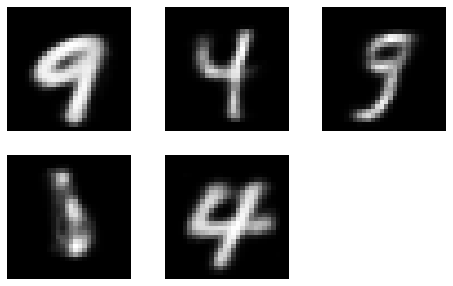

In [148]:
vae_beta_3 = VAE_Model(x_dim=X_DIM, z_dim=Z_DIM, device=device).to(device)
vae_beta_3.load_state_dict(torch.load('vae_mnist_beta_1.0.pth'))

n_samples = 5
vae_beta_3.eval()
vae_samples = vae_beta_3.sample(num_samples=n_samples).view(n_samples, 28, 28).data.cpu().numpy()
fig = plt.figure(figsize=(8 ,5))
for i in range(vae_samples.shape[0]):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.imshow(vae_samples[i], cmap='gray')
    ax.set_axis_off()

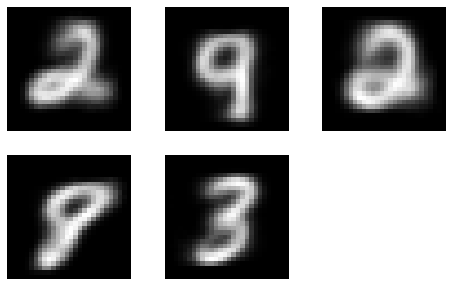

In [158]:
vae_beta_4 = VAE_Model(x_dim=X_DIM, z_dim=Z_DIM, device=device).to(device)
vae_beta_4.load_state_dict(torch.load('vae_mnist_beta_5.0.pth'))

n_samples = 5
vae_beta_4.eval()
vae_samples = vae_beta_4.sample(num_samples=n_samples).view(n_samples, 28, 28).data.cpu().numpy()
fig = plt.figure(figsize=(8 ,5))
for i in range(vae_samples.shape[0]):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.imshow(vae_samples[i], cmap='gray')
    ax.set_axis_off()

### <img src="https://img.icons8.com/bubbles/48/000000/ask-question.png" style="height:50px;display:inline"> Question 1 - $\beta$-VAE
We will now analyze the results. Answer the following questions:
1. Explain intuitively the loss function of $\beta$-VAE. In your answer, explain the trade-off between the reconstruction loss and the KL-divergence and how it is affected by the $\beta$ parameter. Hint: think about regularization as you learned in the ML course (for example, in linear regression).
2. What is the main trend in the KL and reconstruction loss vs. epochs? In your answer, you should compare between the $\beta$'s.
3. For what values of $\beta$ you would expect better reconstruction (why would we want better reconstruction?) and for what values you would expect higher-quality samples? In your answer, refer to the blurriness in the samples you plotted.
4. Run the cell where you plot the samples (if you separated the cells for each $\beta$, then run all of them) a couple of times (just hit Ctrl + Enter). For which value of $\beta$ there is more *diversity* in the samples?

#### Answer 1

1. The loss function is composed of two components the reconstruction loss and the KL-divergence.<br>
reconstruction loss: This is a data fitting term demanding that the encoder decoder combination is close to identity mapping.<br>
KL-divergence: applies regularization on the output of the encoder in the latent space.<br>
The parameter $\beta$ controls the relative strength between the two terms, the bigger $\beta$ the more randomness is allowed in the decoder mapping from z to X.

2. We can see that as $\beta$ increases the reconstruction loss increases.<br>
We can see that as $\beta$ decreases the the KL-divergence increases

3. We expect better reconstruction for small values off $\beta$.<br>
We want small reconstruction loss so that the encoder decoder combination will be close to the identity mapping.
When the reconstruction loss is larger we get more blurry samples


4. We get more diversity in the samples for $\beta = 1,5$ , for $\beta = 0.05$ we get mostly $8$,$9$ and $3$.<br>


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2 - Conditional VAE (CVAE)

Conditional Variational Autoencoder (CVAE) is an extension of Variational Autoencoder (VAE).
However, as you may have noticed, we have no control on the data generation process on VAE. That is, for example, on MNIST, we could not control the latent space, and when we sampled, we would not know what digit would be generated. This could be problematic if we want to generate some specific data. As an example, suppose we want to convert a unicode character to handwriting. In vanilla VAE, there is no way to generate the handwriting based on the character that the user inputted. Concretely, suppose the user inputted character ‘2’, how do we generate handwriting image that is a character ‘2’? We couldn’t.

Hence, CVAE was developed. Whereas VAE essentially models latent variables and data directly, CVAE models lantent variables and data, both conditioned to some random variables.
Recall, on VAE, the objective is:
$$\log P(X) -  D_{KL}[Q(z|X) || P(z|X)]  =  \mathbb{E}_{Q(z|X)}[\log P(X|z)] -D_{KL}[Q(z|X)|| P(z)]  $$
that is, we want to optimize the log likelihood of our data $P(X)$ under some “encoding” error. The original VAE model has two parts: the encoder $Q(x|Z)$ and the decoder $P(X|z)$.

If we focus on the encoder, it models the latent variable $z$ directly based on $X$, and it doesn't care about the different types of $X$ (e.g., it doesn't care if it is 1 or an 8). But wait, this was all the idea of **unspervised learning**, we have no access to labels. Well, in this case, we have some information (thus, CVAE is sometimes referred to as **semi-supervised** learning model).

Similarly, in the decoder part, it only models $X$ directly based on the latent variable $z$. So, how do we tell the VAE what we want to generate? We can condition encoder and decoder to another things, let's denote them with $c$ (for "condition").

* The encoder is now conditioned on 2 variables- $X, c$: $Q(z|X,c)$ and the decoder in now conditioned on- $z$, $c$: $P(X|z,c)$
* Hence, our variational lower bound objective is now in this following form: $$ \log P(X|c) -  D_{KL}[Q(z|X,c) || P(z|X,c)]  =  \mathbb{E}_{Q(z|X,c)}[\log P(X|z,c)] -D_{KL}[Q(z|X,c)|| P(z|c)] $$ (we just conditioned all of the distributions with a variable $c$)
* So what is different? Almost nothing! We still model $P(z|c) \sim \mathcal{N}(0,I)$, and the rest are modeled by the neural network.
* But how is it done in practice? Simple! **Concatenation**: instead of encoding $X$, we encoded $[X,c]$, that is, we concatenate them. Same for the decoder: we take the latent variable $z$ and concatenate with $c$ and then the input of the decoder is $[z,c]$.
* In PyTorch, we concatenate with `x = torch.cat([x, x_cond], dim=1)` (the 0 dimension is the batch dimension).

The tasks:
* Load the Fashion-MNIST dataset, as in the tuorial, and create a train loader. Note that you get both the images and their **labels**.
* The labels are the classes (0-9). In order to use them in the network we need to convert them to one-hot vectors (0 -> [1,0,0,0,0,0,0,0,0,0], 1 -> [0,1,0,0,0,0,0,0,0,0] ...). The length of the one hot vector in as the number of classes. You are given a function that converts ints to one-hot vectors, use it on the labels, before you perform the concatenation.
* Modify the VAE architecture to support conditionals.
    * Copy-paste the skeleton (the original VAE, from the begining of the tutorial), and just modify the current functions. Note that there **are very few** changes needed.
    * Here are some tips, but feel free to implement as you wish, as long as it works:
        * In Python, you can let a function input be `None`, and then if the user inputs something that is not `None`, the function would act different. Here is an example: `def encode(x, x_cond=None): if x_cond is not None: ...`
        * Here are the parts that we recommend you change:
            * In the Vae module:
                * `def __init__(self, x_dim=28*28, z_dim=10, hidden_size=256, device=torch.device("cpu"), cond_dim=None)`
                * `def sample(self, num_samples=1, x_cond=None)`
                * `def forward(self, x, x_cond=None)`
            * Note that this are the minimal changes that can be done to implement VAE that supports CVAE. No need to modify VaeEncoder and VaeDecoder when we are using fully-connected layers. However, if we were to use convolutional layers, we would have to change also the encoder and decoder since convolutional layers work on images, and only after the images features from the convolutional layers have been extracted, we would concatenate the the condional $c$ (just before the fully-connected layers that output $\mu, \sigma$.
* Train CVAE on the Fashion-MNIST dataset (100 epochs, at least). Use $\beta$-VAE loss function (it shouldn't have changed from the regular VAE. Save a checkpoint of the network in the format: `fmnist_beta_(value of beta)_cvae_(number of epochs)_epochs.pth`. The rest of the hyper-parameters are up to you.
* Plot $n_{samples}=6$ from the CVAE for 6 classes of your choosing.
* **Tip**: this may take a while, so if everything seems to work, let it run on Google Colab and go grab another coffee.

In [187]:
def labels_to_one_hots(batch, num_classes=10):
    """
    Converts batch of integes numbers to one-hot vector given the vector length
    :param batch: batch of values to convert
    :param num_classes: length of the vector
    :return: one_hot_batch
    """
    one_hot_batch = torch.zeros(batch.size(0), num_classes).to(batch.device)
    for i in range(batch.size(0)):
        one_hot_batch[i, int(batch[i].data.cpu().item())] = 1
    return one_hot_batch

In [188]:
# your code here - you can use as many cells as you need
# fashion mnist dataset and data-loader
fmnist_train_dataset = torchvision.datasets.FashionMNIST(root='./datasets/',
                                           train=True, 
                                           transform=torchvision.transforms.ToTensor(),
                                           download=True)

fmnist_test_dataset = torchvision.datasets.FashionMNIST(root='./datasets',
                                          train=False, 
                                          transform=torchvision.transforms.ToTensor())

# Data loader
batch_size = 64
fmnist_train_loader = torch.utils.data.DataLoader(dataset=fmnist_train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True, drop_last=True)

fmnist_test_loader = torch.utils.data.DataLoader(dataset=fmnist_test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)
examples = enumerate(fmnist_test_loader)
batch_idx, (example_data, example_targets) = next(examples)
batch_idx

0

In [189]:
# Class for the encoder 

class Encoder_C(nn.Module):
    def __init__(self,z_dim = 10,x_dim = 28*28,device = torch.device("cpu")):
        super(Encoder_C, self).__init__()
        # network parameters
        self.z_dim = z_dim
        self.x_dim = x_dim
        self.device = device
        
        # network fully connected layers
        
        self.fc1 = nn.Linear(x_dim,512)
        self.fc2 = nn.Linear(512,256)
        #self.fc3 = nn.Linear(128,64)
        
        # latent variable networks
        self.mu_nn = nn.Linear(256,z_dim)
        self.log_var_nn = nn.Linear(256,z_dim)
        
        self.dropout = nn.Dropout(p=0.1)
    
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        # Forward propogation
        x = F.relu(self.dropout(self.fc1(x)))
        x = self.dropout(self.fc2(x))
        #x = F.relu(self.dropout(self.fc3(x)))
        mu = self.mu_nn(x)
        log_var = self.log_var_nn(x)
        
        z = reparameterize(mu, log_var, self.device)
        # returns the latent variable the m,ean and the log variance
        # 
        return z,mu,log_var
        

In [190]:
# Class for the decoder 
class Decoder_C(nn.Module):
    def __init__(self,z_dim = 10,x_dim = 28*28,device = torch.device("cpu")):
        super(Decoder_C, self).__init__()
        # network parameters
        self.z_dim = z_dim
        self.x_dim = x_dim
        self.device = device
        
        # network fully connected layers
        
        self.fc4 = nn.Linear(512,x_dim)
        #self.fc3 = nn.Linear(128,x_dim)
        self.fc2 = nn.Linear(256,512)
        self.fc1 = nn.Linear(self.z_dim,256)
        
        self.dropout = nn.Dropout(p=0.02)
    
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.dropout(self.fc1(x)))
        x = F.relu(self.dropout(self.fc2(x)))
        #x = F.relu(self.dropout(self.fc3(x)))
        x = torch.sigmoid(self.dropout(self.fc4(x)))
        #x = torch.sigmoid(x)
        return x

In [191]:
class VAE_Model_C(nn.Module):
    def __init__(self,z_dim = 10,x_dim = 28*28,device = torch.device("cpu"),cond_dim=None):
        super(VAE_Model_C, self).__init__()
        
        self.z_dim = z_dim
        self.x_dim = x_dim
        self.device = device
        self.cond_dim = 0 if cond_dim is None else cond_dim
        
        self.encoder = Encoder_C(self.z_dim , self.x_dim ,self.device)
        self.decoder = Decoder_C(self.z_dim + self.cond_dim,self.x_dim,self.device)
        
    def sample(self, num_samples=1, x_cond=None):
        """
        This functions generates new data by sampling random variables and decoding them.
        Vae.sample() actually generates new data!
        Sample z ~ N(0,1)
        """
        if x_cond is None:
            z = torch.randn(num_samples, self.z_dim).to(self.device)
            return self.decoder(z)
        else:
            z = torch.randn(num_samples, self.z_dim).to(self.device)
            z = torch.cat([z,labels_to_one_hots(x_cond,num_classes=self.cond_dim)],dim=1)
            #print(z.shape)
            return self.decoder(z)
    
    def forward(self, x, x_cond=None):
        if x_cond is None: 
            z,mu,log_var = self.encoder(x)
            x_r = self.decoder(z)
            return x_r,mu,log_var,z
        else:
            c = labels_to_one_hots(x_cond,num_classes=self.cond_dim).to(self.device)
            #x = torch.cat([x,c],dim=1)
            z,mu,log_var = self.encoder(x)
            z = torch.cat([z,c],dim=1)
            x_r = self.decoder(z)
            return x_r,mu,log_var,z            

In [192]:
X_DIM = 28*28
Z_DIM = 10
LEARNING_RATE = 0.002

beta_list = [1]
Epochs = 100

In [193]:
# Saving the results in a dictionary of list
reconstruction_loss_list = {'train':[],'test':[]}
kl_loss_list = {'train':[],'test':[]}
total_loss_list = {'train':[],'test':[]}

# initialize a dictionary of list for batch results
batch_loss_dict = {'kl_loss':[],'reconstruction_loss':[],
                    'toatl_loss':[]}


# Training Loop
for beta in beta_list:
    cond_dim=10
    vae_c = VAE_Model_C(x_dim=X_DIM, z_dim=Z_DIM, device=device,cond_dim=10).to(device)
    optimizer = torch.optim.Adam(params=vae_c.parameters(), lr=LEARNING_RATE)
    # Save losses for each batch in a list 
    batch_loss_dict['kl_loss'] = []
    batch_loss_dict['reconstruction_loss'] = []
    batch_loss_dict['toatl_loss'] = []
    
    for epoch in range(Epochs):
        epoch_start_time = time.time()
        for batch_i,batch in enumerate(fmnist_train_loader):
            vae_c.train()
            #x = batch[0].to(device)
            x = batch[0].to(device)
            x = x.view(batch_size,-1)
            y = batch[1]
            x_r,mu,log_var,z = vae_c(x,y)
            c = labels_to_one_hots(y,num_classes=10).to(device)
            #x_orig = torch.cat([x,c],dim=1)
            total_loss,recon_error , kl = beta_loss_function(x_r, x, mu, log_var, loss_type='bce', beta=beta)
            batch_loss_dict['kl_loss'].append(kl.item())
            batch_loss_dict['reconstruction_loss'].append(recon_error.item())
            batch_loss_dict['toatl_loss'].append(total_loss.item())   
            
            optimizer.zero_grad()
            total_loss.backward()
            optimizer.step()
        
        kl_loss_list['train'].append(sum(batch_loss_dict['kl_loss'])/len(batch_loss_dict['kl_loss']))    
        
        reconstruction_loss_list['train'].append(sum(batch_loss_dict['reconstruction_loss'])/len(batch_loss_dict['reconstruction_loss']))    
        
        total_loss_list['train'].append(sum(batch_loss_dict['toatl_loss'])/len(batch_loss_dict['toatl_loss']))
        Print_fn(epoch,total_loss_list['train'][-1],time.time() - epoch_start_time,beta,'train')
        batch_loss_dict['kl_loss'] = []
        batch_loss_dict['reconstruction_loss'] = []
        batch_loss_dict['toatl_loss'] = []
        
        #TODO print results for training

    fname = "./cvae_fmnist_"+".pth"

    torch.save(vae_c.state_dict(), fname)
    print("saved checkpoint @", fname)


epoch: 0 loss: 273.75050 epoch time 18.570sec beta: 1 , train
epoch: 1 loss: 258.93492 epoch time 18.651sec beta: 1 , train
epoch: 2 loss: 256.69453 epoch time 18.506sec beta: 1 , train
epoch: 3 loss: 255.70796 epoch time 18.555sec beta: 1 , train
epoch: 4 loss: 255.04172 epoch time 18.641sec beta: 1 , train
epoch: 5 loss: 254.41779 epoch time 18.690sec beta: 1 , train
epoch: 6 loss: 254.01129 epoch time 18.542sec beta: 1 , train
epoch: 7 loss: 253.87368 epoch time 18.457sec beta: 1 , train
epoch: 8 loss: 253.55092 epoch time 18.551sec beta: 1 , train
epoch: 9 loss: 253.30379 epoch time 18.518sec beta: 1 , train
epoch: 10 loss: 253.09386 epoch time 18.683sec beta: 1 , train
epoch: 11 loss: 252.99000 epoch time 18.474sec beta: 1 , train
epoch: 12 loss: 252.75377 epoch time 18.501sec beta: 1 , train
epoch: 13 loss: 252.63842 epoch time 18.643sec beta: 1 , train
epoch: 14 loss: 252.61258 epoch time 18.902sec beta: 1 , train
epoch: 15 loss: 252.56497 epoch time 18.804sec beta: 1 , train
ep

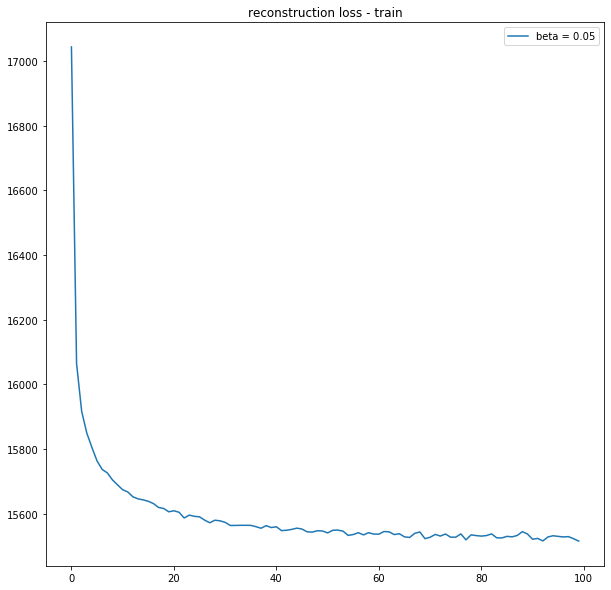

In [194]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

axes.plot(range(Epochs),reconstruction_loss_list['train'][0:Epochs],label='beta = 0.05')
#axes[1].plot(range(Epochs),reconstruction_loss_list['test'][0:Epochs],label='beta = 0.05')

axes.set_title('reconstruction loss - train')
#axes[1].set_title('reconstruction loss - test')

axes.legend()
#axes[1].legend()

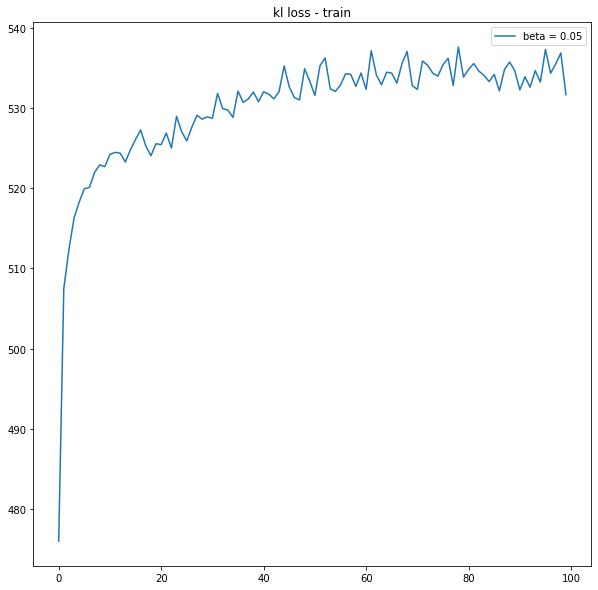

In [195]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(10,10))


axes.plot(range(Epochs),kl_loss_list['train'][0:Epochs],label='beta = 0.05')
#axes[1].plot(range(Epochs),kl_loss_list['test'][0:Epochs],label='beta = 0.05')


axes.set_title('kl loss - train')
#axes[1].set_title('kl loss - test')

axes.legend()
#axes[1].legend()

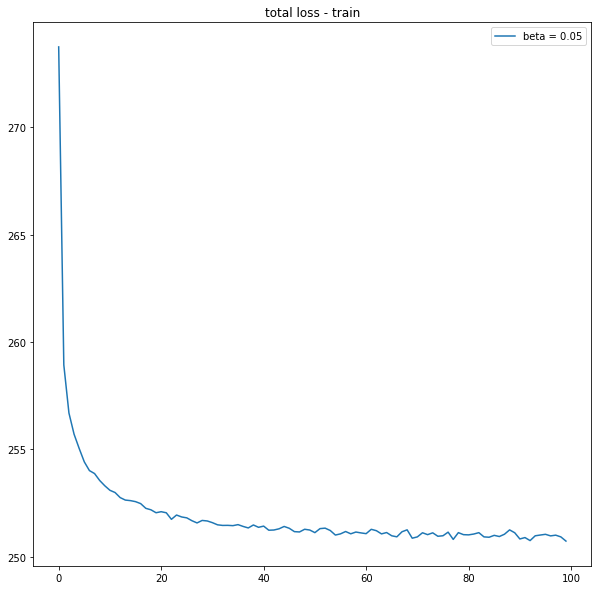

In [196]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(10,10))


axes.plot(range(Epochs),total_loss_list['train'][0:Epochs],label='beta = 0.05')
#axes[1].plot(range(Epochs),total_loss_list['test'][0:Epochs],label='beta = 0.05')

axes.set_title('total loss - train')
#axes[1].set_title('total loss - test')

axes.legend()
#axes[1].legend()

In [79]:
# generate samples
vae_cond = VAE_Model_C(x_dim=X_DIM, z_dim=Z_DIM, device=device,cond_dim=10).to(device)
vae_cond.load_state_dict(torch.load('cvae_fmnist_.pth'))

vae_cond.eval()

VAE_Model_C(
  (encoder): Encoder(
    (fc1): Linear(in_features=784, out_features=512, bias=True)
    (fc2): Linear(in_features=512, out_features=256, bias=True)
    (mu_nn): Linear(in_features=256, out_features=10, bias=True)
    (log_var_nn): Linear(in_features=256, out_features=10, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (decoder): Decoder(
    (fc4): Linear(in_features=512, out_features=784, bias=True)
    (fc2): Linear(in_features=256, out_features=512, bias=True)
    (fc1): Linear(in_features=20, out_features=256, bias=True)
    (dropout): Dropout(p=0.02, inplace=False)
  )
)

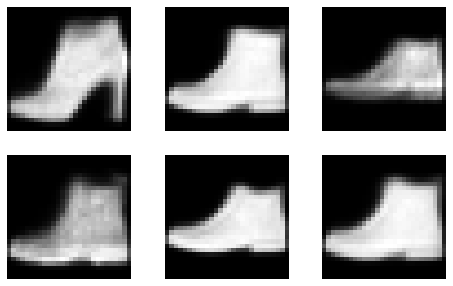

In [197]:
# sample from the class 9 - ankle boot
n_samples = 6
y_c = torch.ones(6)
y_c = 9*y_c
y_c = y_c.to(device)
vae_samples = vae_cond.sample(num_samples=n_samples,x_cond=y_c)
vae_samples = vae_samples.to('cpu')
vae_samples_c = vae_samples[:,:784]

vae_samples_c = vae_samples_c.view(n_samples, 28, 28).data.cpu().detach().numpy()
fig = plt.figure(figsize=(8 ,5))
for i in range(vae_samples.shape[0]):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.imshow(vae_samples_c[i], cmap='gray')
    ax.set_axis_off()

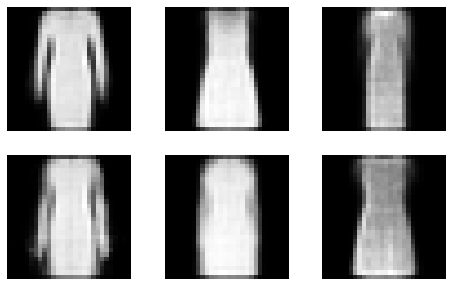

In [200]:
# sample from the calss 3 - Dress
n_samples = 6
y_c = torch.ones(6)
y_c = 3*y_c
y_c = y_c.to(device)
vae_samples = vae_cond.sample(num_samples=n_samples,x_cond=y_c)
vae_samples = vae_samples.to('cpu')
vae_samples_c = vae_samples[:,:784]

vae_samples_c = vae_samples_c.view(n_samples, 28, 28).data.cpu().detach().numpy()
fig = plt.figure(figsize=(8 ,5))
for i in range(vae_samples.shape[0]):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.imshow(vae_samples_c[i], cmap='gray')
    ax.set_axis_off()

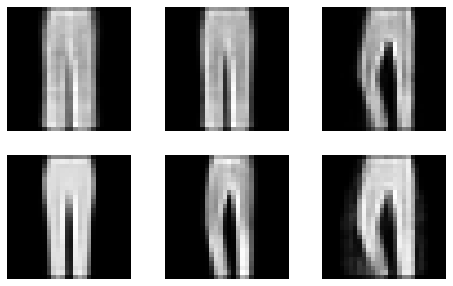

In [203]:
# sample from the class 1 - Trouser
n_samples = 6
y_c = torch.ones(6)
y_c = 1*y_c
y_c = y_c.to(device)
vae_samples = vae_cond.sample(num_samples=n_samples,x_cond=y_c)
vae_samples = vae_samples.to('cpu')
vae_samples_c = vae_samples[:,:784]

vae_samples_c = vae_samples_c.view(n_samples, 28, 28).data.cpu().detach().numpy()
fig = plt.figure(figsize=(8 ,5))
for i in range(vae_samples.shape[0]):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.imshow(vae_samples_c[i], cmap='gray')
    ax.set_axis_off()

### <img src="https://img.icons8.com/bubbles/48/000000/ask-question.png" style="height:50px;display:inline"> Question 2 - Conditional VAE
1. Can we perform interpolation of the latent space as we did in the tutorial? What is the meaning of doing **in-class** interpolation in the case of Fashion-MNIST? Explain.
2. Why did we convert the the classes number to one-hot vectors? Think of the other inputs to the networks and the values that the neurons accept. What is the risk of using just one number as the condition instead of a vector?
3. How is the quality of the samples? How can the quality be improved? In you answer, refer to the bluriness in the samples.

#### Answer 2

1. We cant perform interpolation of the latent space between two different calsses, because the label of the class is one hot encoded and we concatinate it with the latent space vriable so if we do interpolation between two latent space variable we will get an interpulated condition vector concatinated to the latent variable.<br>
We can interpulated between two images from the same class and then we will get a smooth transition between two same class samples for example a transition from a long dress to a short dress.

2. We converted the classes number to one-hot vectors so that the network will treat each class equally and the training 
process will be unbiased, if we didnt convert the categorical represantation to one hot vectors the network will assume that the higher the numerical value of the class category the more important the class is and the network will lean toward learning the features of that class hence the learning process wil be biased.


3. The samples are recognizable but are pretty blurry.<br>
The quality can be improved by using a cnn based model since we are dealing with images, plus we can try a variaty of regulariztion techniques like batch normaliztion, different dropout rates different activation functions and apply $\beta$ 
regulariztion on the kl component off the loss function like we did in exercise 1.

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2 - BONUS - Pokemon: Gotta Generate 'Em All!
This is a **non-mandatory**, more challenging task. Come back here only if you are done with the rest of the exercise and want to take on a challenge.

* Note - you should pick one of the following:
    * Fully-connected - work with grayscale images (5 points)
    * Convolutional - work with RGB images (10 points)
* No matter what type of model you chose, you need to answer the bonus questions that follow the code.

In this task we are going to (try) generate new pokemons! Our dataset includes ~900 pokemons. Each sample is a 60x60 image and the type of the pokemon (18 classes). The type is already in one-hot form. If you have access to a GPU, we recommend trying the convolutional version of this task.

Let's look at the data, for the **fully-connected** version.

In [35]:
from pokemon_dataset import PokemonDataset
poke_data = PokemonDataset(root='./data/pokemon', rgb=False)
sample_dataloader = DataLoader(poke_data, batch_size=6, shuffle=True, drop_last=True)

can you name these pokemons?


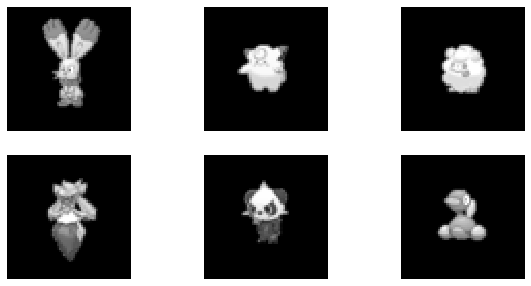

In [36]:
fig = plt.figure(figsize=(10 ,5))
samples, labels = next(iter(sample_dataloader))
for i in range(samples.size(0)):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.imshow(samples[i][0].data.cpu().numpy(), cmap="gray")
    ax.set_axis_off()
    
print("can you name these pokemons?")

In [37]:
# let's look at the types encoding
poke_data.type_to_one_hot

OrderedDict([('Bug',
              array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                     0.])),
             ('Dark',
              array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                     0.])),
             ('Dragon',
              array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                     0.])),
             ('Electric',
              array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                     0.])),
             ('Fairy',
              array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                     0.])),
             ('Fighting',
              array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                     0.])),
             ('Fire',
              array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                     0.])),
             ('Fl

**The task**: Implement CVAE for the pokemon dataset, it should not be different than the one you implemented for Fashion-MNIST. The task is to define the model and tune the hyper-parameters. 
Note that due to being a really small dataset (only 900 examples!) you will need a really large number of epochs to get something. We don't expect to see actual pokemons, but we want to see the that the networks learned something. You will also need a larger latent space dimension, as pokemons are more complex than cloths.

* Train CVAE on the pokemon dataset. Save a checkpoint once you are done: `pokemon_beta_(value of beta)_vae_(num epochs)_epochs.pth`.
* Plot samples for at least 6 types of your choosing (try to find the better ones).
* Plot reconstructions for at least 6 types of your choosing.

In [38]:
# your code here - you can use as many cells as you need

can you name these pokemons?


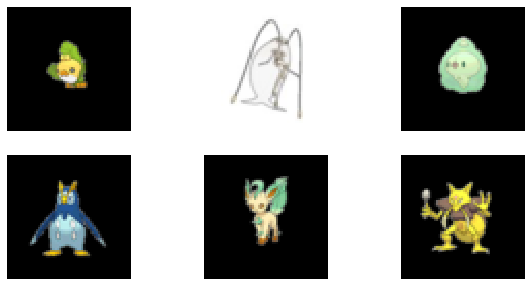

In [39]:
from pokemon_dataset import PokemonDataset
poke_data = PokemonDataset(root='./data/pokemon', rgb=True)
sample_dataloader = DataLoader(poke_data, batch_size=6, shuffle=True, drop_last=True)

fig = plt.figure(figsize=(10 ,5))
samples, labels = next(iter(sample_dataloader))
for i in range(samples.size(0)):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.imshow(samples[i].permute(1, 2, 0).data.cpu().numpy())  # permute to (Height, Width, Channels)
    ax.set_axis_off()
    
print("can you name these pokemons?")

### Your Turn
* Impelement the convolutional CVAE and train it. Save a checkpoint `"pokemon_cnn_beta_(value of beta)_vae_(num epochs)_epochs.pth"`
* Plot samples for at least 6 types of your choosing (try to find the better ones).
* Plot reconstructions for at least 6 types of your choosing.


* Note that the call to the loss function in the training loop is in the form: `loss = loss_function(x_recon, x.permute(0, 2, 3, 1), mu, logvar, loss_type='bce', beta=beta)`.
    * This is because `x_recon` is in the shape (batch_size, H, W, C) and `x` is (batch_size, C, H, W).
* Use a lower leraning rate (start with `1e-4`).

* Components:
    * Conv2D - `nn.Conv2d(in_channels, out_channels, kernel_size, stride)`
    * Deconv2d - `nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding, output_padding)`
    * Batch Normalization 1D - `nn.BatchNorm1d(num_features, affine=True)`
    * Batch Normalization 2D - `nn.BatchNorm2d(num_features, affine=True)`
    * Calculate the convolutional output size with `_get_conv_out(self, shape)` as in tutorial 8.
    * FC/Linear - `nn.Linear(in, out)`

#### Encoder Architecture - `VaeCnnEncoder(torch.nn.Module)`
* Block 1:
    * Conv2d - `in_channels=3, out_channels=128, kernel_size=(3, 3), stride=(2, 2), padding=1`
    * Batch Normalization 2D - 128 features
    * ReLU (or any other activation you want)
* Block 2:
    * Conv2d - `in_channels=128, out_channels=64*4, kernel_size=(3, 3), stride=(2, 2), padding=1`
    * Batch Normalization 2D - $64*4$ features
    * ReLU (or any other activation you want)
* Block 3:
    * Conv2d - `in_channels=64*4, out_channels=64*8, kernel_size=(3, 3), stride=(2, 2), padding=1`
    * Batch Normalization 2D - $64*8$ features
    * ReLU (or any other activation you want)
* FC1 ($\mu$) - `nn.Linear(self._get_conv_out(x_shape) + self.cond_dim, self.z_dim)`
* FC1 ($\Sigma$) - `nn.Linear(self._get_conv_out(x_shape) + self.cond_dim, self.z_dim)`

#### Decoder Architecture - `VaeCnnDecoder(torch.nn.Module)`
* FC1 ($z$) - `nn.Linear(self.z_dim (+cond_dim), 64 * 4 * 4 * 4)`
* Batch Normalization 1D - $64*4*4*4$ features.
* Block 1:
    * Deconv2d - `in_channels=64 * 4, 64 * 2, kernel_size=(3, 3), stride=(2, 2), padding=1, output_padding=1`
    * Batch Normalization 2D - 128 features
    * ReLU (or any other activation you want)
* Block 2:
    * Deconv2d - `in_channels=128, 64, kernel_size=(3, 3), stride=(2, 2), padding=1, output_padding=1`
    * Batch Normalization 2D - 64 features
    * ReLU (or any other activation you want)
* Block 3:
    * Deconv2d - `in_channels=64, 64, kernel_size=(3, 3), stride=(2, 2), padding=2, output_padding=1`
    * Batch Normalization 2D - 64 features
    * ReLU (or any other activation you want)
* Deconv2d - `in_channels=64, 3, kernel_size=(3, 3), stride=(2, 2), padding=1, output_padding=1`
* Sigmoid



In [40]:
# your code here - you can use as many cells as you need

### <img src="https://img.icons8.com/bubbles/48/000000/ask-question.png" style="height:50px;display:inline"> Bonus Question
1. What do you think about the results on the Pokemon dataset? Name at least 2 reasons for the VAE somewhat low performance on the Pokemon dataest.
2. Suggest ideas to improve the performance (at least 2).

#### Bonus Answer

1. Reasons for the VAE to fail:
    * Not enough data
    * Data too diverse
    * Network not expressive enough
2. Improvements:
    * More complex architectures
    * Data augmentation
    * More tuning
    * Manually group pokemon with similar apperance in the same class (for the condition).

### <img src="https://img.icons8.com/cotton/64/000000/grand-master-key.png" style="height:50px;display:inline"> Part 2 - Spectral Clustering - Prologue
In this task we are going to explore Spectral Clustering for image segmentation. 
In computer vision, **image segmentation** is the process of partitioning a digital image into multiple segments (sets of pixels, also known as image objects). The goal of segmentation is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze. Image segmentation is typically used to locate objects and boundaries (lines, curves, etc.) in images. More precisely, image segmentation is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics.

We are going tor compare K-Means to Spectral Clustering, and as you recall, K-Means is also a step in the the spectral clustering algorithm (remember where?).

In [41]:
# imports for the exrcise - part 2
# you can add more if you wish (but it is not really needed)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from PIL import Image
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings

# sklearn imports
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering, KMeans

warnings.filterwarnings(category=UserWarning, action="ignore")

### <img src="https://img.icons8.com/bubbles/48/000000/ask-question.png" style="height:50px;display:inline"> Question 3 - Spectral Clustering Demonstration
Run the next code cell and answer (below the code cell) the following questions:
1. Run the cell 3 times (Ctrl + Enter). Why are the results different in each run?
2. The `image_to_graph` function builds a graph from the image. Explain how the graph is built (you can read the documentation of this function with `help(image.img_to_graph)`. What are the weights of edges?
3. Explain the code commands in lines (press Esc + L to view line numbers): 9, 12

1. The code below performs spectral clustering with k = 60 on the avengers logo.<br>
The results are different in each run because in the spectral clustering algorithm (when $K>1$) we perform k-means algorithm on the vectors that are the rows of the matrix constructed from the k eigenvectors corresponding to the k smallest eigenvalues (without the ones vector) of the laplacian matrix, beacause k means is randomly initialized and converges to a local minima we will get different results every time.  

2. The image_to_graph function builds a graph from the image by applying gradient operation on the image and we build a graph of pixel-to-pixel gradient connections where the edges are the weighted gradient values.

3. We add random noise to the image after that we convert the image to a graph representation with the gradients as egde weights after the we convert the gradient values to an affinity measure.

total time: 3.260 sec


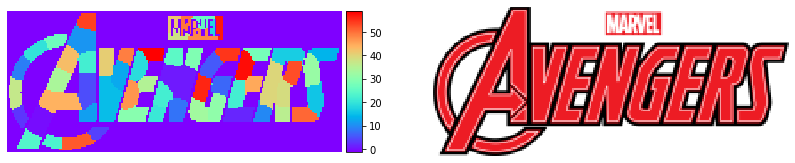

In [165]:
# run this cell
start_time = time.time()
original_img = Image.open("./data/a_logo_s.png")
grayscale_image = original_img.convert("L")  # convert to grayscale
img = np.array(grayscale_image)  # convert to np.array
img[img==255] = 0  # zero-out the background, we don't care about it
mask = img.astype(np.bool)  # create a mask for the graph-building function
img = img.astype(float) / 255  # convert to numbers in [0,1]
img += 1 / 255 + (0.2 / 255) * np.random.randn(*img.shape)  # add random noise

graph = image.img_to_graph(img, mask=mask)  # build a graph with the gradients as weights
graph.data = np.exp(-graph.data / graph.data.std())  # convert gradients to affinity

labels = spectral_clustering(graph, n_clusters=60, eigen_solver='arpack')  # run spectral clustering
label_im = np.full(mask.shape, -1.0)  # labels -> image
label_im[mask] = labels  # assign correct labels

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(121)
imsh = ax1.imshow(label_im, cmap=plt.cm.rainbow)
ax1.set_axis_off()
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(imsh, cax=cax)
ax2 = fig.add_subplot(122)
ax2.imshow(np.array(original_img))
ax2.set_axis_off()
print("total time: {:.3f} sec".format(time.time() - start_time))

#### Answer 3

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3 - Image Segmentation with Spectral Clustering & K-Means
1. Run K-Means on `a_logo_s.png`. Tune the number of clusters and number of iterations and plot the results in the same way as in the demonstration.
    * In order to use K-means on images, you need to reshape it: `img.reshape(-1,1)`
    * To run K-Means: create an instance of K-Means: `k_means = KMeans(n_clusters=, max_iter=)` and *fit* the reshaped img: `k_means.fit(...)`
    * To access the labels (=the assignment) of each pixel, call `labels = k_means.labels_`
2. Load `iron_man_p_s.png` and run K-Means and Spectral Clustering. Tune each algorithm's hyper-parameters. Plot the results.

In [43]:
# your code here - you can use as many cells as you need


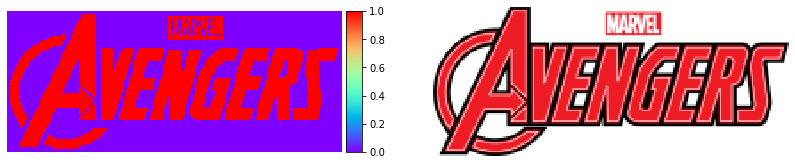

In [44]:
# kmeans with k=2
vec_img = img.reshape(-1,1)
k_means = KMeans(n_clusters=2, max_iter=350)

res = k_means.fit(vec_img)
labels = res.labels_

mask = img.astype(np.bool)

label_im = np.full(mask.shape, -1.0)  # labels -> image
label_im[:] = labels.reshape(img.shape)  # assign correct labels

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(121)
imsh = ax1.imshow(label_im, cmap=plt.cm.rainbow)
ax1.set_axis_off()
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(imsh, cax=cax)
ax2 = fig.add_subplot(122)
ax2.imshow(np.array(original_img))
ax2.set_axis_off()

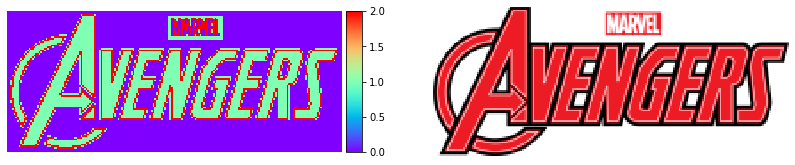

In [45]:
# kmeans with k=3

vec_img = img.reshape(-1,1)
k_means = KMeans(n_clusters=3, max_iter=350)

res = k_means.fit(vec_img)
labels = res.labels_

mask = img.astype(np.bool)

label_im = np.full(mask.shape, -1.0)  # labels -> image
label_im[:] = labels.reshape(img.shape)  # assign correct labels

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(121)
imsh = ax1.imshow(label_im, cmap=plt.cm.rainbow)
ax1.set_axis_off()
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(imsh, cax=cax)
ax2 = fig.add_subplot(122)
ax2.imshow(np.array(original_img))
ax2.set_axis_off()

total time: 1.733 sec


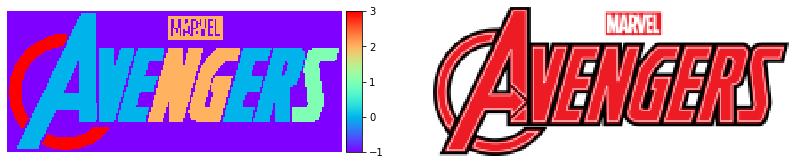

In [46]:
# spectral clustering on avengers logo
start_time = time.time()
original_img = Image.open("./data/a_logo_s.png")
grayscale_image = original_img.convert("L")  # convert to grayscale
img = np.array(grayscale_image)  # convert to np.array
img[img==255] = 0  # zero-out the background, we don't care about it
mask = img.astype(np.bool)  # create a mask for the graph-building function
img = img.astype(float) / 255  # convert to numbers in [0,1]
img += 1 / 255 + (0.2 / 255) * np.random.randn(*img.shape)  # add random noise

graph = image.img_to_graph(img, mask=mask)  # build a graph with the gradients as weights
graph.data = np.exp(-graph.data / graph.data.std())  # convert gradients to affinity

labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')  # run spectral clustering
label_im = np.full(mask.shape, -1.0)  # labels -> image
label_im[mask] = labels  # assign correct labels

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(121)
imsh = ax1.imshow(label_im, cmap=plt.cm.rainbow)
ax1.set_axis_off()
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(imsh, cax=cax)
ax2 = fig.add_subplot(122)
ax2.imshow(np.array(original_img))
ax2.set_axis_off()
print("total time: {:.3f} sec".format(time.time() - start_time))

total time: 235.670 sec


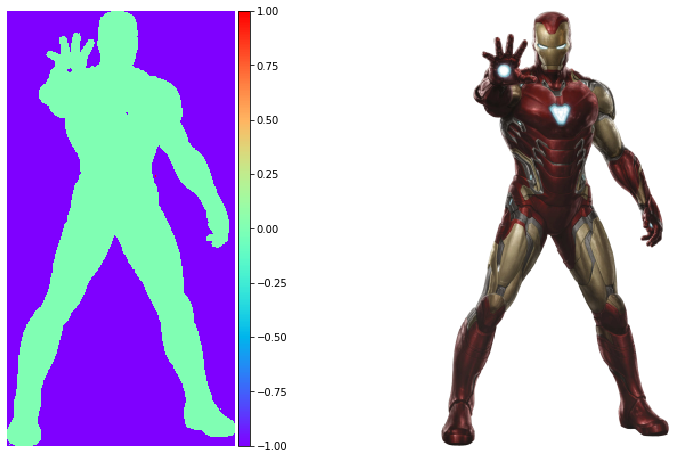

In [47]:
# spectral clustering on ironman image with k = 2
ironman_img = Image.open("./data/iron_man_p_s.png")
grayscale_image = ironman_img.convert("L")  # convert to grayscale
img = np.array(grayscale_image)  # convert to np.array
img[img==255] = 0  # zero-out the background, we don't care about it
mask = img.astype(np.bool)  # create a mask for the graph-building function
img = img.astype(float) / 255  # convert to numbers in [0,1]
img += 1 / 255 + (0.2 / 255) * np.random.randn(*img.shape)  # add random noise

graph = image.img_to_graph(img, mask=mask)  # build a graph with the gradients as weights
graph.data = np.exp(-graph.data / graph.data.std())  # convert gradients to affinity

labels = spectral_clustering(graph, n_clusters=2, eigen_solver='arpack')  # run spectral clustering
label_im = np.full(mask.shape, -1.0)  # labels -> image
label_im[mask] = labels  # assign correct labels

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(121)
imsh = ax1.imshow(label_im, cmap=plt.cm.rainbow)
ax1.set_axis_off()
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(imsh, cax=cax)
ax2 = fig.add_subplot(122)
ax2.imshow(np.array(ironman_img))
ax2.set_axis_off()
print("total time: {:.3f} sec".format(time.time() - start_time))

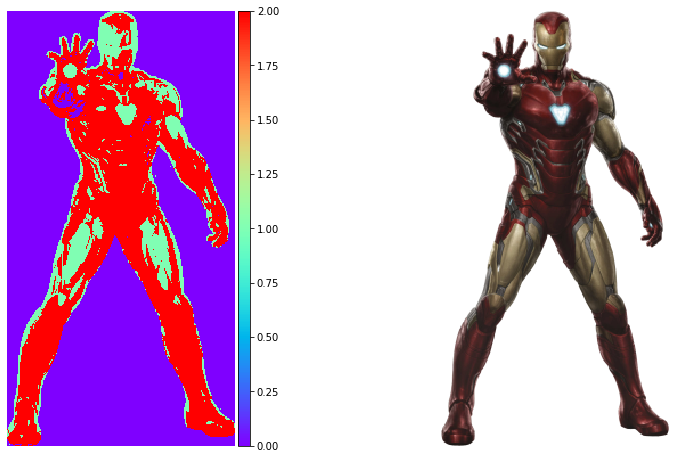

In [177]:
# k means clustering on ironman image with k = 2
ironman_img = Image.open("./data/iron_man_p_s.png")
grayscale_image = ironman_img.convert("L")  # convert to grayscale
ironman_arr = np.array(grayscale_image)
vec_img = ironman_arr.reshape(-1,1)
k_means = KMeans(n_clusters=3, max_iter=250)

res = k_means.fit(vec_img)
labels = res.labels_

mask = ironman_arr.astype(np.bool)

label_im = np.full(mask.shape, -1.0)  # labels -> image
label_im[:] = labels.reshape(ironman_arr.shape)  # assign correct labels

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(121)
imsh = ax1.imshow(label_im, cmap=plt.cm.rainbow)
ax1.set_axis_off()
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(imsh, cax=cax)
ax2 = fig.add_subplot(122)
ax2.imshow(np.array(ironman_img))
ax2.set_axis_off()

### <img src="https://img.icons8.com/bubbles/48/000000/ask-question.png" style="height:50px;display:inline"> Question 4 - Image Segmentation with Spectral Clustering & K-Means
1. Compare the results of K-Means and Spectral Clustering on the Avengers logo. Which algoirthm yields more satisfying results, in your opinion? Explain.
2. Compare the results of K-Means and Spectral Clustering on Iron Man. Explain how did you tune the parameters (i.e., how did you pick the number of clusters). What is the difference between the Avengers logo and Iron Man?
3. Summarize the advantages and disadvantages of K-Means and Spectral Clustering for image segmentation (running time, type of images, amount of tuning...)

#### Answer 4

1. In my opinion the spectral clustering algoirthm yields more satisfying results, becuase it seperates completley the subject of the picture (witch is ironman) from the backround. 

2. In the ironman picture we wanted to separate between the subject of the picture as much as posible from the backround.<br>
In the avengeres logo picture when we have 2 clusters we can separate the letters from the background in both algorithms.<br>
When $k>2$ we can see that k-means clusters the edges of the avengers logo and the spectral clustering algorithm, clusters the letters.

3. k-means is ideal for discovering global clusters where all members of the clusters are in proximity to each other and the clusters are far apart.<br> 
Spectral clustering captures connectivity on an emmbedding of the data into a graph.<br>
We saw from the clustering of iron man image that k-means is much faster than spectral clustering. 

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/